In [1]:
#Importing the data
import pandas as pd


file_path = "/content/2021-2022 Football Player Stats.csv"

try_encodings = ["utf-8", "ISO-8859-1", "latin1", "cp1252"]

for encoding in try_encodings:
    try:
        data = pd.read_csv(file_path, sep=";", encoding=encoding)
        print(f"File successfully loaded with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed with encoding: {encoding}")

# Display the first few rows of the DataFrame to verify the data
print(data.head())


Failed with encoding: utf-8
File successfully loaded with encoding: ISO-8859-1
   Rk             Player Nation Pos          Squad            Comp   Age  \
0   1         Max Aarons    ENG  DF   Norwich City  Premier League  22.0   
1   2   Yunis Abdelhamid    MAR  DF          Reims         Ligue 1  34.0   
2   3  Salis Abdul Samed    GHA  MF  Clermont Foot         Ligue 1  22.0   
3   4    Laurent Abergel    FRA  MF        Lorient         Ligue 1  29.0   
4   5        Charles Abi    FRA  FW  Saint-Étienne         Ligue 1  22.0   

   Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon    OG  Recov  AerWon  \
0  2000  30      28  ...  0.04  1.46  1.29    0.0   0.07  0.04   5.46    0.50   
1  1987  31      31  ...  0.00  0.03  1.36    0.0   0.00  0.00   6.91    2.09   
2  2000  30      28  ...  0.00  0.38  1.24    0.0   0.00  0.00   8.68    0.86   
3  1993  31      31  ...  0.03  0.76  2.29    0.0   0.00  0.00   9.10    0.40   
4  2000   1       1  ...  0.00  2.00  0.00    0.0   0.00  0

In [2]:
#Selecting only PL data
pl = data[data['Comp'] == 'Premier League']


In [3]:
colsnames=list(data.columns)
print(colsnames)

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'PasPress', 'Sw', 'PasCrs', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasGround', 'PasLow', 'PasHigh', 'PaswLeft', 'PaswRight', 'PaswHead', 'TI', 'PaswOther', 'PasCmp', 'PasOff', 'PasOut', 'PasInt', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Press', 'PresSucc', 'Press%', 'PresDef3rd', 'PresMid3rd', 

In [4]:
#Selectig only PL midfielders, who have played more than 11 90s
plmf = pl[pl['Pos'] == 'MF']
plmf = plmf.drop(plmf.columns[6:11], axis=1)
mdfp = plmf[plmf['90s'] > 11]

In [5]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
plmf_scale = StandardScaler().fit_transform(plmf.iloc[:, 6:])


In [6]:
#print(list(ht.columns))

In [24]:
#Preparing data for modelling
plmd = mdfp.drop(mdfp.columns[[6, 133, 124, 55, 46, 47, 48, 41, 16]], axis=1)
ht= plmd.drop(plmd.columns[[13,14,39,42,43,44,45,46,47,48,49,52,53,86,99,100,101,102,103,112,114,91,117,78,79,80,81,82,83]], axis=1)

In [8]:
#from sklearn.preprocessing import StandardScaler
#ht_scale = StandardScaler().fit_transform(ht.iloc[:, 6:])

In [25]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ht.columns[6:]

# Apply MinMaxScaler to the selected columns
scaler = MinMaxScaler()
ht_scale = scaler.fit_transform(ht.loc[:, columns_to_normalize])



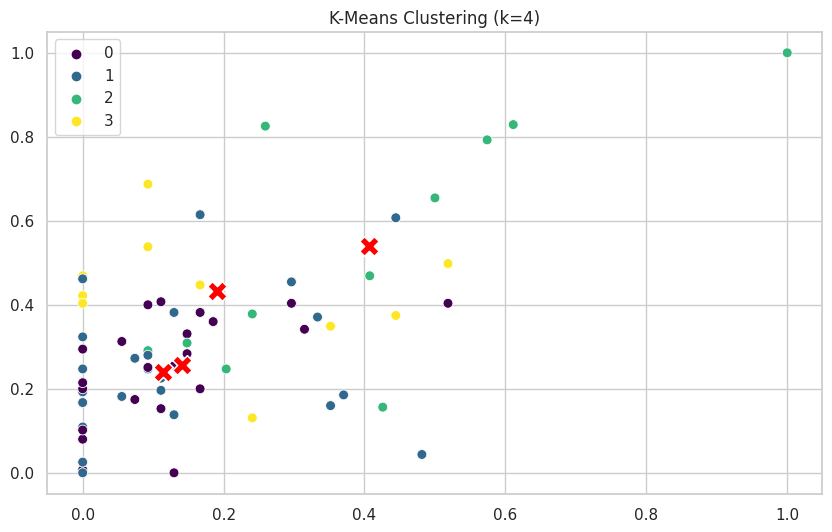

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


seed=42

# Performing k-means clustering
clmd_4 = KMeans(n_clusters=4, n_init=100).fit(ht_scale)

# Cluster centers
cluster_centers = clmd_4.cluster_centers_

# Visualizing the clusters using cluster centers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ht_scale[:, 0], y=ht_scale[:, 1], hue=clmd_4.labels_, palette="viridis", s=50)
sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering (k=4)')
plt.show()

# Add the cluster labels to the original DataFrame
ht['clmd_4'] = clmd_4.labels_






In [33]:
#Adding the player and clmd_4 columns to the scaled data
ht_scale = pd.DataFrame(ht_scale, columns=ht.columns[6:-1])
ht_scale['Player'] = ht['Player'].values
ht_scale['clmd_4'] = ht['clmd_4'].values

In [34]:
print(list(ht_scale.columns))

['Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'Sw', 'PasCrs', 'PasCmp', 'PasOff', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass', 'Int', 'Tkl+Int', 'Clr', 'Touches', 'TouDefPen', 'TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 'TouAttPen', 'TouLive', 'Carries', 'CarTotDist', 'CarPrgDist', 'CarProg', 'Car3rd', 'CPA', 'CarMis', 'CarDis', 'Rec', 'RecProg', 'CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'Recov', 'AerWon', 'AerLost', 'A

In [39]:
ht_scale.shape

(68, 96)

In [36]:
# Splitting the training and test data
import numpy as np

np.random.seed(12345)

# Converting 'clmd_4' to a categorical variable
ht_scale['clmd_4'] = ht_scale['clmd_4'].astype('category')

# Creating indices and shuffling them
indices = np.arange(len(ht_scale))
shuffled_indices = np.random.permutation(indices)

# Defining the proportion for training data
train_proportion = 0.8

# Calculating the number of samples for training
num_train = round(train_proportion * len(ht_scale))

# Splitting the data into training and testing sets
train = ht_scale.iloc[shuffled_indices[:num_train]]
test = ht_scale.iloc[shuffled_indices[num_train:]]

# Displaying the first few rows of the training set
print("Training Set:")
print(train.head())

# Displaying the first few rows of the testing set
print("\nTesting Set:")
print(test.head())


Training Set:
       Goals     Shots       SoT      SoT%      G/Sh  G/SoT   ShoDist  \
60  0.000000  0.080000  0.125984  0.555000  0.000000   0.00  0.305085   
47  0.166667  0.200000  0.196850  0.513333  0.444444   0.38  0.073446   
58  0.000000  0.000000  0.055118  0.416667  0.000000   0.00  0.683616   
43  0.074074  0.272727  0.188976  0.400000  0.148148   0.17  0.457627   
51  0.444444  0.374545  0.338583  0.555000  0.666667   0.55  0.316384   

    PasTotCmp  PasTotAtt  PasTotCmp%  ...       Crs      TklW  PKwon  \
60   0.339450   0.356589    0.631034  ...  0.078818  0.274419    0.0   
47   0.362385   0.404651    0.555172  ...  0.071429  0.916279    0.0   
58   0.527523   0.505426    0.906897  ...  0.059113  0.334884    0.0   
43   0.383792   0.376744    0.765517  ...  0.059113  0.386047    0.0   
51   0.278287   0.246512    0.786207  ...  0.133005  0.474419    0.0   

       PKcon     Recov    AerWon   AerLost   AerWon%              Player  \
60  0.000000  0.458599  0.547619  0.20

##Modelling


> Indented block



### Random Forest

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Set seed (Random seed is not directly available in scikit-learn, so you can use random_state)
np.random.seed(123)


#exclude_columns = [94, 95]
X_train = train.drop(train.columns[[94,95]], axis=1)
y_train = train['clmd_4']
X_test = test.drop(test.columns[[94,95]], axis=1)
y_test = test['clmd_4']

# Run Random Forest with 25 trees
rf_model = RandomForestClassifier(n_estimators=25, max_features=42, random_state=123)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
yhat_rf = rf_model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, yhat_rf)
print(conf_matrix)

# Calculate the error rate
error_rate = np.mean(y_test != yhat_rf)

# Print the accuracy
accuracy_percentage = (1 - error_rate) * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

#92.86% Accuracy


[[6 0 0 0]
 [0 3 0 0]
 [0 1 2 0]
 [0 0 0 2]]
Accuracy: 92.86%


In [41]:
acc = accuracy_score(y_test, yhat_rf)
acc

0.9285714285714286

## Support Vector Machines




In [51]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svmodel = svm.SVC(kernel='poly')
svmodel.fit(X_train, y_train)

predictions = svmodel.predict(X_test)

conf_matrix = pd.crosstab(index=test['clmd_4'], columns=predictions, rownames=['Actual'], colnames=['Predicted'])

accuracy= accuracy_score(y_test, predictions)

print(conf_matrix)
print(accuracy)

#radial (rbf) = 85.71%
#polynomial (poly) = 92.86
#linear = 92.86


Predicted  0  1  2  3
Actual               
0          5  1  0  0
1          0  3  0  0
2          0  0  3  0
3          0  0  0  2
0.9285714285714286


## Pickling The Model File For Deployment

In [52]:
import pickle

In [54]:
# I am pickilng the Support Vector Machine Model with a Polynomiql Kernel
pickle.dump(svmodel, open('svmpoly.pkl', 'wb'))